In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Adherence distribution (fig 1B and 1C)

In [ ]:
individual_valid_summary = './cgm_count_by_day/'
adh_ratio = []
for filename in os.listdir(individual_valid_summary):
  if filename[-4:] == '.csv':
    df = pd.read_csv(individual_valid_summary + filename)
    cur_ratio = [i / 288 if i <= 288 else 1 for i in df.Count.values]
    adh_ratio += cur_ratio
    # break

adh_ratio = [i * 100 for i in adh_ratio]

In [ ]:
no_adh = 0
partial_adh = 0
adh = 0

for i in adh_ratio:
  if i == 0:
    no_adh +=1
  elif i >= 70:
    adh +=1
  else:
    partial_adh += 1

print(no_adh, partial_adh, adh)
print('total days:', no_adh+partial_adh+adh)

32931 8959 76435
total days: 118325


In [ ]:
total = no_adh+partial_adh+adh
values = {'Total':total, 'High adherence \n[70%, 100%]':adh, 'Partial adherence \n(0, 70%)': partial_adh, 'No adherence': no_adh}
percentage = {'Total':100, 'High adherence \n[70%, 100%]':adh/total * 100, 'Partial adherence \n(0, 70%)': partial_adh/total * 100, 'No adherence': no_adh/total * 100}
# percentage

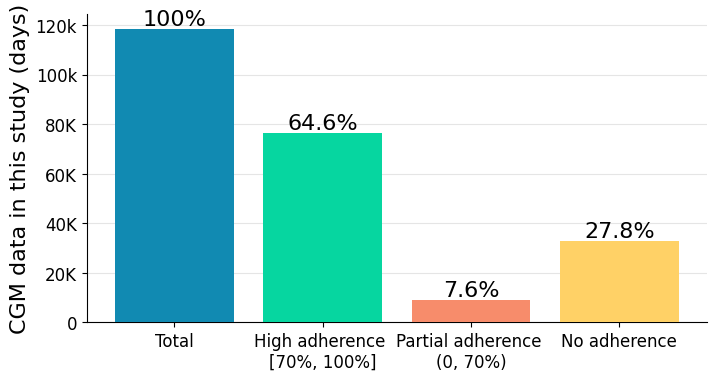

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
colors= ['#118AB2', '#06D6A0', '#F78C6B', '#FFD166']

bar = ax.bar(values.keys(), values.values(), color=colors,zorder=3)
for i in range(len(bar)):
    height = bar[i].get_height()
    plt.text(bar[i].get_x() + bar[i].get_width() / 2.0, height, str(round(list(percentage.values())[i], 1)) + '%',
             ha='center', va='bottom', fontsize=16)

# plt.ylabel('CGM data in this study (days)')
ax.yaxis.grid(color='gray', alpha= .2)
ax.set_zorder(0)
ax.set_ylabel('CGM data in this study (days)', fontsize=16)

# plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks([0,20000,40000,60000,80000,100000, 120000],
           ["0", "20K", "40K", "60K", "80K", "100k", "120k"], fontsize = 12)

# ax.set_xticks([])
# handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(list(values.keys())))]
# plt.legend(handles, list(values.keys()),fontsize=14)

plt.savefig('./figures/cgm_overview_multi_bar.png', bbox_inches='tight')
plt.savefig('./final_figures/cgm_overview_bar.png',bbox_inches='tight')
plt.savefig('./cgm_overview_bar.pdf',bbox_inches='tight')

plt.show()

### Box plot

In [ ]:
df_summary = pd.read_csv('./CGM_summary.csv')
total = df_summary.Duration.values
no_adh = df_summary.MissingDays.values
high_adh = df_summary.ValidDays.values
partial_adh = np.array(df_summary.RecordDays.values) - np.array(high_adh)

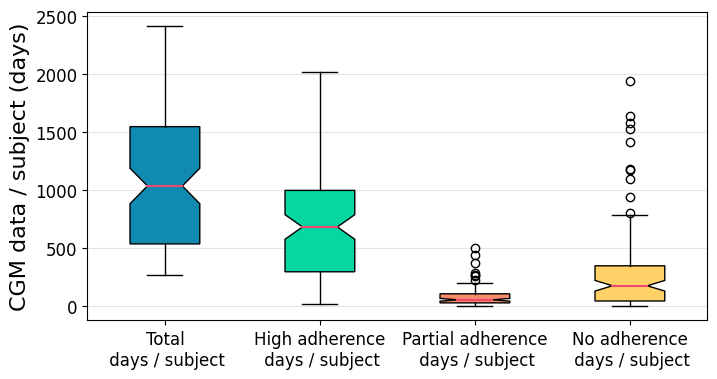

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
labels =['Total\n days / subject', 'High adherence\n days / subject', 'Partial adherence\n days / subject', 'No adherence\n days / subject']
colors= ['#118AB2', '#06D6A0', '#F78C6B', '#FFD166']

data = [total, high_adh, partial_adh, no_adh]
bp = ax.boxplot(data, notch=True, medianprops = dict(color = "#EF476F", linewidth = 1.5), patch_artist=True)

for box, color in zip(bp['boxes'], colors):
  box.set_facecolor(color)

plt.xticks([1, 2, 3, 4], labels)
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
ax.yaxis.grid(color='gray', alpha= .2)
ax.set_zorder(0)
ax.set_ylabel('CGM data / subject (days)', fontsize=16)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.savefig('./figures/cgm_overview_boxplot.png', bbox_inches='tight')
plt.savefig('./final_figures/cgm_overview_boxplot.png',bbox_inches='tight')
plt.savefig('./final_figures/cgm_overview_boxplot.pdf',bbox_inches='tight')
plt.show()

# Demographic info (fig 1D)

In [4]:
df = pd.read_csv('./demographic_data_summary_final.csv')

## Gender

In [31]:
gender_lst = []
for i in range(len(df.sweetgoals_id.values)):
  gender_lst.append(df.gender.values[i])
print(len(gender_lst))

108


In [32]:
sex_dict = {}
for i in df.gender.unique():
  sex_dict.update({i: gender_lst.count(i)})

sex_dict = {k: v for k, v in sex_dict.items() if v}

print(sex_dict)

{'2: Female': 78, '1: Male': 26, '3: Other': 4}


In [33]:
sex_dict['N/A'] = sex_dict[list(sex_dict.keys())[2]]
del sex_dict[list(sex_dict.keys())[3]]
print(sex_dict)

{'2: Female': 78, '1: Male': 26, '3: Other': 4}


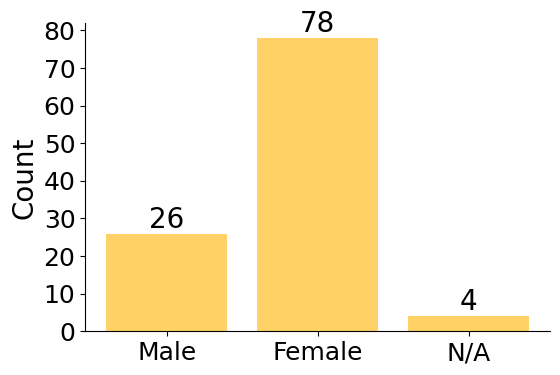

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

bar_container = ax.bar(['Male', 'Female', 'N/A'], [26, 78, 4], color='#FFD166')
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize = 20)
ax.set_ylabel('Count', fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('./figures/demographic/gender.jpg',bbox_inches='tight')
plt.savefig('./final_figures/demographic/gender.png',bbox_inches='tight')
plt.savefig('./final_figures/demographic/gender.pdf',bbox_inches='tight')

plt.show()

## HbA1c

In [11]:
a1c_lst = []
for i in range(len(df.sweetgoals_id.values)):
  # print(i)
  if not np.isnan(df.A1c.values[i]):
    a1c_lst.append(df.A1c.values[i])

print("The number of subjects have a1c values:", len(a1c_lst))

The number of subjects have a1c values: 94


In [12]:
print('The number of subjects does not have A1c:', 108 - len(a1c_lst))
print("avg and std:", round(np.mean(a1c_lst), 2), round(np.std(a1c_lst), 2))

The number of subjects does not have A1c: 14
avg and std: 8.4 1.3


In [13]:
a1c_dict = {'[6,8)':0, '[8,10)':0, '[10,12)':0, '[12,15)':0}
for i in a1c_lst:
  if i >= 6 and i < 8 :
    a1c_dict['[6,8)'] += 1
  elif i >= 8 and i < 10:
    a1c_dict['[8,10)'] += 1
  elif i >= 10 and i < 12:
    a1c_dict['[10,12)'] += 1
  elif i >= 12:
    a1c_dict['[12,15)'] += 1

a1c_dict.update({'N/A': 108 - len(a1c_lst)})
print(a1c_dict)

{'[6,8)': 37, '[8,10)': 46, '[10,12)': 9, '[12,15)': 2, 'N/A': 14}


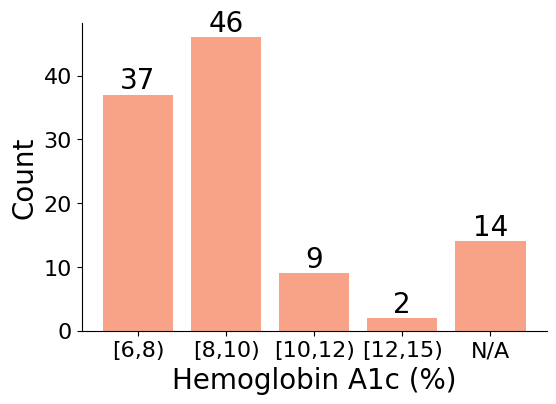

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

bar_container = ax.bar(a1c_dict.keys(), a1c_dict.values(), color='#F78C6B', alpha=.8)
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize = 20)

ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Hemoglobin A1c (%)', fontsize=20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.savefig('./figures/demographic/HbA1c.jpg', bbox_inches='tight')
plt.savefig('./final_figures/demographic/HbA1c.png',bbox_inches='tight')
plt.savefig('./final_figures/demographic/HbA1c.pdf',bbox_inches='tight')

plt.show()

## Diagnosis Duration

In [1]:
diag_lst = []
for i in range(len(df.sweetgoals_id.values)):
  # print(i)
  if not np.isnan(df.diagnosis_duration.values[i]):
    diag_lst.append(df.diagnosis_duration.values[i])
# print(len(diag_lst), diag_lst)

In [16]:
print('The number of subjects does not have diagnosis duration:', 108 - len(diag_lst))
print("avg and std:", round(np.mean(diag_lst), 2), round(np.std(diag_lst), 2))

The number of subjects does not have diagnosis duration: 2
avg and std: 11.5 5.29


In [18]:
diag_dict = {'[2,7)':0, '[7,15)':0, '[15,23)':0, '[23,27]':0}
for i in diag_lst:
  if i >= 2 and i < 7 :
    diag_dict['[2,7)'] += 1
  elif i >= 7 and i < 15:
    diag_dict['[7,15)'] += 1
  elif i >= 15 and i < 23:
    diag_dict['[15,23)'] += 1
  elif i >= 23:
    diag_dict['[23,27]'] += 1

diag_dict.update({'N/A': 108 - len(diag_lst)})
print(diag_dict)

{'[2,7)': 23, '[7,15)': 56, '[15,23)': 24, '[23,27]': 3, 'N/A': 2}


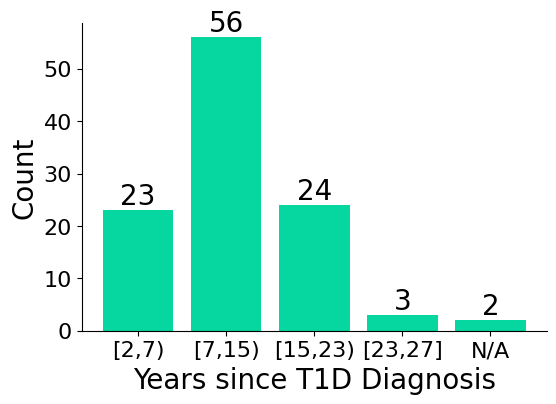

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

bar_container = ax.bar(diag_dict.keys(), diag_dict.values(), color='#06D6A0')
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize = 20)
# ax.set(ylabel='Count', xlabel='Years since T1D Diagnosis')
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Years since T1D Diagnosis', fontsize=20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.savefig('./figures/demographic/diag_duration.jpg', bbox_inches='tight')
plt.savefig('./final_figures/demographic/diagnosis_duration.png',bbox_inches='tight')
plt.savefig('./final_figures/demographic/diagnosis_duration.pdf',bbox_inches='tight')

plt.show()

## Age

In [2]:
age_lst = []
for i in range(len(df.sweetgoals_id.values)):
  # print(i)
  if not np.isnan(df.age.values[i]):
    age_lst.append(df.age.values[i])
# print(len(age_lst),age_lst)

In [36]:
print('The number of subjects does not have age:', 108 - len(age_lst))
print("avg and std:", round(np.mean(age_lst), 2), round(np.std(age_lst), 2))
print(max(age_lst))

The number of subjects does not have age: 0
avg and std: 22.84 3.02
29


In [37]:
age_dict = {'19-21':0, '22-25':0, '26-29':0}
for i in age_lst:
  if i >= 19 and i <= 21 :
    age_dict['19-21'] += 1
  elif i >= 22 and i <= 25:
    age_dict['22-25'] += 1
  elif i >= 26 and i <= 30:
    age_dict['26-29'] += 1

# age_dict.update({'N/A': 108 - len(age_lst)})
print(age_dict)

{'19-21': 44, '22-25': 38, '26-29': 26}


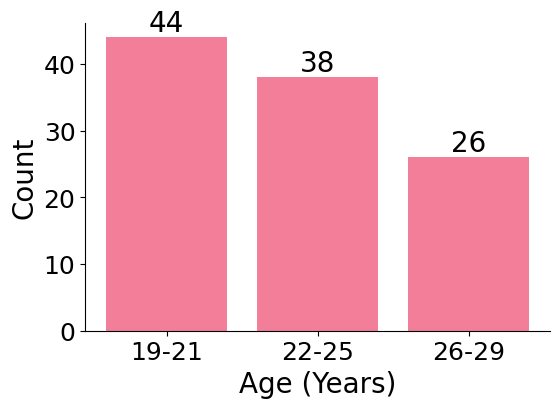

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

bar_container = ax.bar(age_dict.keys(), age_dict.values(), color='#EF476F', alpha=.7)
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize = 20)
# ax.set(ylabel='Count', xlabel='Age (Years)')
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Age (Years)', fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

plt.savefig('./figures/demographic/age.jpg', bbox_inches='tight')
plt.savefig('./final_figures/demographic/age.png',bbox_inches='tight')
plt.savefig('./final_figures/demographic/age.pdf',bbox_inches='tight')

plt.show()

# One week CGM example (fig 1E)

In [3]:
cgm_root = './csv_cgm/'
subject_id = '.'
df = pd.read_csv(cgm_root + subject_id + '.csv')

In [ ]:
app_id = '.'
demo_df = pd.read_csv('./CGM_summary.csv')

for i in demo_df.values:
  if app_id == i[0]:
    print(i[1])
    break

32


In [4]:
date = []
time = []
date_time = df["displayTime"].tolist()
timestamp1 = []
for i in range(len(df)):
  date2, time2 = date_time[i].split('T')
  timestamp2 = date2 + ' ' + time2
  date.append(date2)
  time.append(time2)
  timestamp1.append(timestamp2)

df = df.drop(['systemTime', 'guid', 'updatedAt', 'syncTimestamp'], axis=1)
df['date1'] = date
df['time'] = time
df['date'] = timestamp1
df.head()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.strftime('%W')
df['year'] = df['date'].dt.strftime('%Y')
df['day'] = df['date'].dt.strftime('%a')

In [5]:
df_date = df[df['year'] == '2022']
week_data = df_date[df_date['week']=='23'] # week start at 0, so this is the 24th week of the year.
week_data

In [ ]:
week_data.date1.unique()

array(['2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
       '2022-06-10', '2022-06-11', '2022-06-12'], dtype=object)

In [6]:
mon = week_data[week_data.day == 'Mon']
tue = week_data[week_data.day == 'Tue']
wed = week_data[week_data.day == 'Wed']
thu = week_data[week_data.day == 'Thu']
fri = week_data[week_data.day == 'Fri']
sat = week_data[week_data.day == 'Sat']
sun = week_data[week_data.day == 'Sun']

mon['timestamp'] = pd.to_datetime(mon['date'], format='%M:%S.%f') + timedelta(days = 6)
tue['timestamp'] = pd.to_datetime(tue['date'], format='%M:%S.%f') + timedelta(days = 5)
wed['timestamp'] = pd.to_datetime(wed['date'], format='%M:%S.%f') + timedelta(days = 4)
thu['timestamp'] = pd.to_datetime(thu['date'], format='%M:%S.%f') + timedelta(days = 3)
fri['timestamp'] = pd.to_datetime(fri['date'], format='%M:%S.%f') + timedelta(days = 2)
sat['timestamp'] = pd.to_datetime(sat['date'], format='%M:%S.%f') + timedelta(days = 1)
sun['timestamp'] = pd.to_datetime(sun['date'], format='%M:%S.%f')

all_data = pd.concat([mon,tue,wed,thu,fri,sat,sun])
all_data.tail()

In [ ]:
def get_oneday_plt(weekday_df):
  time_split = []
  start, end = 0, 0
  for i in range(len(weekday_df.values)-1):
    diff = (weekday_df.values[i+1][12] - weekday_df.values[i][12]) / np.timedelta64(1, 'm')
    if diff >= 10:
      end = i
      time_split.append([start, end])
      start = i+1
  end = i
  time_split.append([start, end])
  return time_split

get_oneday_plt(sat)

[[0, 42], [43, 182]]

In [ ]:
all_data.to_csv('./oneweek_example.csv')

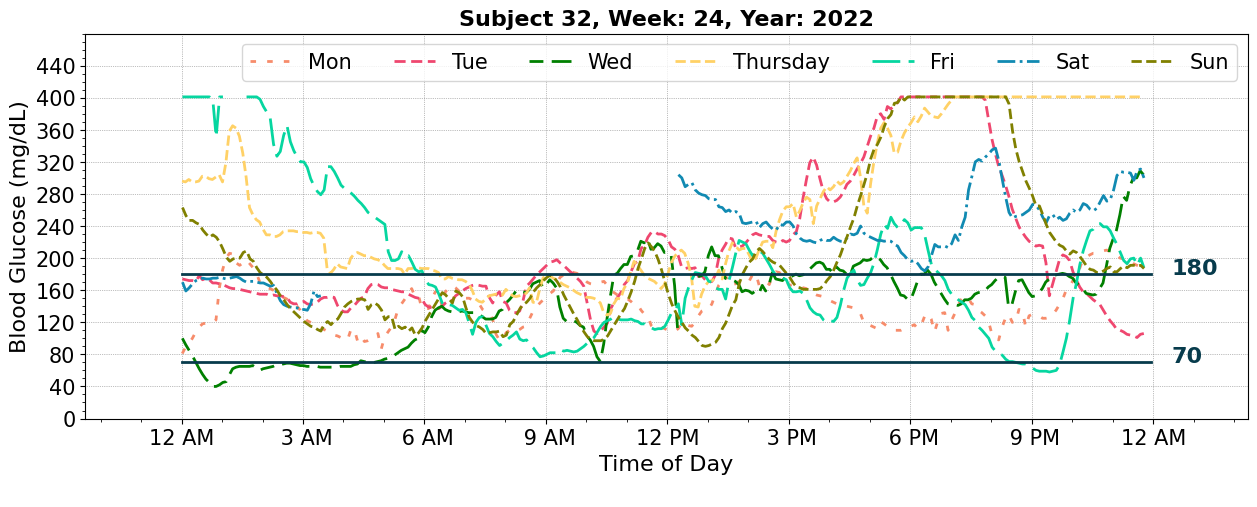

In [ ]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.margins(.1, .5)

xfmt = dates.DateFormatter('%l %p')
h_loc = dates.HourLocator(byhour=range(0,24,3))
ax.xaxis.set_minor_locator(dates.HourLocator())
ax.xaxis.set_major_locator(h_loc)
ax.xaxis.set_major_formatter(xfmt)
# ax.set_ylim(0, 400)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_locator(ticker.LinearLocator())
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Time of Day\n", fontsize=16)
ax.set_ylabel("Blood Glucose (mg/dL)", fontsize=16)
ax.set_title('Subject 32, Week: 24, Year: 2022', fontweight = 'bold', fontsize=16)

pd.plotting.register_matplotlib_converters()
split = get_oneday_plt(mon)
for i in split:
  l1 = ax.plot(mon['timestamp'][i[0]:i[1]], mon['glucoseValue'][i[0]:i[1]], '--', linewidth=2, color='#F78C6B', dashes = (2, 4), label= "Mon")
split = get_oneday_plt(tue)
for i in split:
  l2 = ax.plot(tue['timestamp'][i[0]:i[1]], tue['glucoseValue'][i[0]:i[1]], '-.', linewidth=2, color='#EF476F', dashes = (4, 2), label= "Tue")
split = get_oneday_plt(wed)
for i in split:
  l3 = ax.plot(wed['timestamp'][i[0]:i[1]], wed['glucoseValue'][i[0]:i[1]], '--g', linewidth=2, dashes = (5, 3, 10, 3), label= "Wed")
split = get_oneday_plt(thu)
for i in split:
  l4 = ax.plot(thu['timestamp'][i[0]:i[1]], thu['glucoseValue'][i[0]:i[1]], '--', linewidth=2, color ='#FFD166', label= "Thursday")
split = get_oneday_plt(fri)
for i in split:
  l5 = ax.plot(fri['timestamp'][i[0]:i[1]], fri['glucoseValue'][i[0]:i[1]], '--',linewidth=2, color='#06D6A0' , dashes = (10, 3, 10, 3), label= "Fri")
split = get_oneday_plt(sat)
for i in split:
  l6 = ax.plot(sat['timestamp'][i[0]:i[1]], sat['glucoseValue'][i[0]:i[1]], '-.', linewidth=2, color='#118AB2', label= "Sat")
split = get_oneday_plt(sun)
for i in split:
  l7 = ax.plot(sun['timestamp'][i[0]:i[1]], sun['glucoseValue'][i[0]:i[1]], '--', linewidth=2, color='olive', label= "Sun")


ax.plot([min(all_data['timestamp']), max(all_data['timestamp'])], [180, 180], linewidth=2, color ='#073B4C', label = 'high')
ax.plot([min(all_data['timestamp']), max(all_data['timestamp'])], [70, 70], linewidth=2, color ='#073B4C', label = 'low')
ax.annotate('180', (max(all_data['timestamp']) + timedelta(minutes = 30), 180), fontsize=16, color ='#073B4C', fontweight = 'bold')
ax.annotate('70', (max(all_data['timestamp'])  + timedelta(minutes = 30), 70), fontsize=16, color ='#073B4C', fontweight = 'bold')
lines = l1 + l2 + l3 + l4 + l5 + l6 + l7
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc = 'upper right',  ncol = 7, fontsize = 15)
plt.grid(color='gray', linewidth=0.5, linestyle = ':')
plt.ylim((0,480))
plt.yticks(np.arange(0, 480, step=40))

plt.savefig("./figures/supplementary_2.png", bbox_inches='tight')


# TIR / TAR / mean BG

In [ ]:
individual_valid_summary = './cgm_count_by_day/'
cgm_root = "./csv_cgm/"

In [ ]:
TIR_lst, TAR_lst, TBR_lst = [], [], []
mean_lst = []
gluc_var_lst = []

for filename in os.listdir(individual_valid_summary):
  if filename[-4:] == '.csv':
    ind_df = pd.read_csv(individual_valid_summary + filename)
    valid_ind_df = ind_df[ind_df['Valid'] == 1]
    valid_ind_date = [i.split(' ')[0] for i in valid_ind_df['displayTime'].values]
    cgm_df = pd.read_csv(cgm_root + filename)[['displayTime', 'glucoseValue']]

    # drop values that have exactly same displayTime, (only keep the first one)
    cgm_df['time'] = pd.to_datetime(cgm_df['displayTime'], utc=True, infer_datetime_format=True)
    cgm_df.drop_duplicates(subset=['time'], inplace=True)
    cgm_df.dropna(subset=['time'], inplace=True)

    cgm_df['Date'] = [i.split('T')[0] for i in cgm_df.displayTime.values]
    valid_mask = cgm_df['Date'].isin(valid_ind_date)
    valid_cgm_df = cgm_df[valid_mask]

    for i in valid_ind_date:
      glucose_daily = valid_cgm_df[valid_cgm_df.Date == i].glucoseValue.values
      mean_lst.append(np.mean(glucose_daily))
      TIR_gluc = [j for j in glucose_daily if j >= 70 and j <= 180]
      TIR_lst.append(len(TIR_gluc) / len(glucose_daily))
      TAR_gluc = [j for j in glucose_daily if j > 180]
      TAR_lst.append(len(TAR_gluc) / len(glucose_daily))
      TBR_gluc = [j for j in glucose_daily if j < 70]
      TBR_lst.append(len(TBR_gluc) / len(glucose_daily))

      gluc_var = np.std(glucose_daily) / np.mean(glucose_daily)
      gluc_var_lst.append(gluc_var)

    # break

<ipython-input-6-dbb271f43056>:10: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  cgm_df = pd.read_csv(cgm_root + filename)[['displayTime', 'glucoseValue']]
<ipython-input-6-dbb271f43056>:10: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  cgm_df = pd.read_csv(cgm_root + filename)[['displayTime', 'glucoseValue']]
<ipython-input-6-dbb271f43056>:10: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  cgm_df = pd.read_csv(cgm_root + filename)[['displayTime', 'glucoseValue']]


In [ ]:
print("Total valid count", len(TIR_lst))
print('TIR:', round(np.mean(TIR_lst), 4), round(np.std(TIR_lst), 4))
print('mean:', round(np.mean(mean_lst), 2), round(np.std(mean_lst), 2))
print('glucose variability:', round(np.mean(gluc_var_lst), 2), round(np.std(gluc_var_lst), 2))

Total valid count 76435
TIR: 0.4697 0.2411
mean: 195.17 49.19
glucose variability: 0.33 0.1


In [ ]:
print('TAR:', round(np.mean(TAR_lst), 4), round(np.std(TAR_lst), 4))
print('TBR:', round(np.mean(TBR_lst), 4), round(np.std(TBR_lst), 4))

TAR: 0.509 0.2506
TBR: 0.0212 0.0443


In [ ]:
summary_lst = [TIR_lst, TAR_lst, TBR_lst, mean_lst, gluc_var_lst]
summary_T = np.array(summary_lst).T
print(np.array(summary_lst).shape, summary_T.shape)
df = pd.DataFrame(summary_T, columns=['TIR', 'TAR', 'TBR', 'meanBG', 'GlucoseVar'])
df.to_csv('./summary_TIR_meanBG_gluVar.csv', index=None)

(5, 76435) (76435, 5)


## Blood Glucose figures (fig 1F)

In [ ]:
df = pd.read_csv('./summary_TIR_meanBG_gluVar.csv')
TIR_lst = df.TIR.values

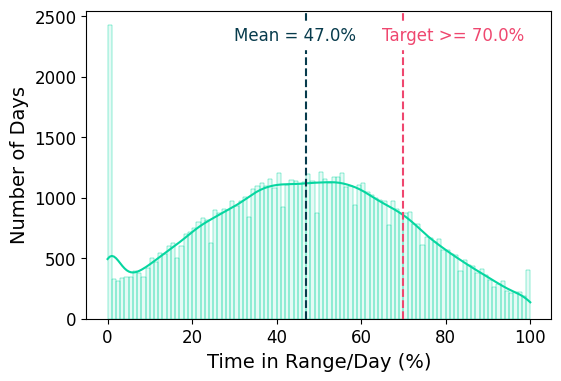

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.histplot([i* 100 for i in TIR_lst], kde=True, color = '#06D6A0', edgecolor = '#06D6A0', alpha = 0.1, binwidth = 1)
plt.axvline(x = round(np.mean(TIR_lst), 3) * 100, c='#073B4C', linestyle='--')
plt.annotate('Mean = ' + str(round(np.mean(TIR_lst), 3) * 100) + '%', xy =(30, 2300), color = '#073B4C', fontsize = 12,
             bbox=dict(boxstyle="round",
                   ec='white',
                   fc='white',
                   ))

plt.axvline(x = 70, c='#EF476F', linestyle='--')
plt.annotate('Target >= ' + str(70.00) + '%', xy =(65, 2300), color = '#EF476F', fontsize = 12,
             bbox=dict(boxstyle="round",
                   ec='white',
                   fc='white',
                   ))
plt.ylabel('Number of Days',  fontsize = 14)
plt.xlabel('Time in Range/Day (%)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.xlim(0, 70)
# plt.axvspan(0, 70, facecolor = '#06D6A0', alpha = .1)

plt.savefig('./figures/TIR_valid_day.jpg', bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/TIR_valid_day.png',bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/TIR_valid_day.pdf',bbox_inches='tight')

plt.show()

In [ ]:
df = pd.read_csv('./summary_TIR_meanBG_gluVar.csv')
TAR_lst = df.TAR.values

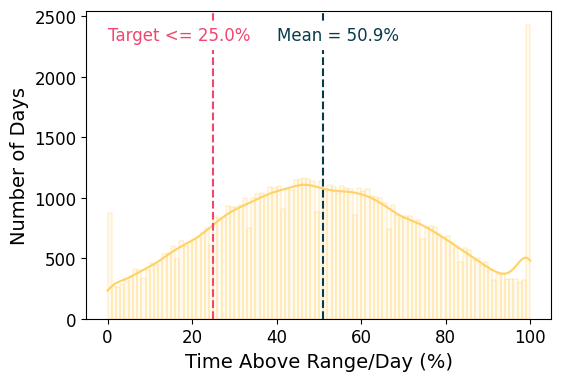

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.histplot([i* 100 for i in TAR_lst], kde=True, color = '#FFD166', edgecolor = '#FFD166', alpha = 0.1, binwidth = 1)
plt.axvline(x = round(np.mean(TAR_lst), 3) * 100, c='#073B4C', linestyle='--')
plt.annotate('Mean = ' + str(round(np.mean(TAR_lst), 3) * 100) + '%', xy =(40, 2300), color = '#073B4C', fontsize = 12,
             bbox=dict(boxstyle="round",
                   ec='white',
                   fc='white',
                   ))

plt.axvline(x = 25, c='#EF476F', linestyle='--')
plt.annotate('Target <= ' + str(25.00) + '%', xy =(0, 2300), color = '#EF476F', fontsize = 12,
             bbox=dict(boxstyle="round",
                   ec='white',
                   fc='white',
                   ))
plt.ylabel('Number of Days',  fontsize = 14)
plt.xlabel('Time Above Range/Day (%)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('./figures/TAR_valid_day.jpg', bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/TAR_valid_day.png',bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/TAR_valid_day.pdf',bbox_inches='tight')

plt.show()

In [ ]:
df = pd.read_csv('./summary_TIR_meanBG_gluVar.csv')
mean_lst = df.meanBG.values
# df.head()

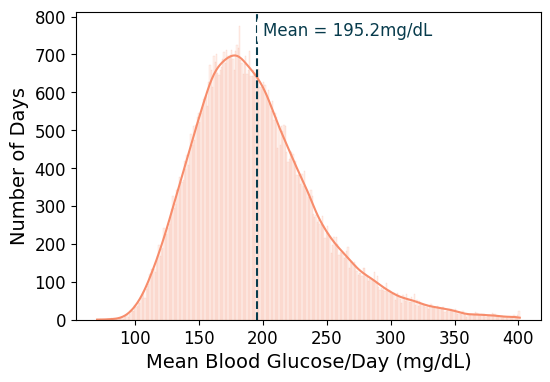

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(6, 4))
sns.histplot([i for i in mean_lst], kde=True, color = '#F78C6B', edgecolor = '#F78C6B', alpha = 0.1, binwidth = 1)
plt.axvline(x = np.mean(mean_lst), c='#073B4C', linestyle='--')
plt.annotate('Mean = ' + str(round(np.mean(mean_lst), 1)) + 'mg/dL', xy =(200, 750), color = '#073B4C', fontsize = 12,
             bbox=dict(boxstyle="round",
                   ec='white',
                   fc='white',
                   ))
plt.ylabel('Number of Days',  fontsize = 14)
plt.xlabel('Mean Blood Glucose/Day (mg/dL)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('./figures/meanBG_valid_day.jpg', bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/meanBG_valid_day.png',bbox_inches='tight')
plt.savefig('./final_figures/CGM variables/meanBG_valid_day.pdf',bbox_inches='tight')

plt.show()